In [1]:
from ensembles import RandomForestMSE, GradientBoostingMSE

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('kc_house_data.csv')

In [4]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [5]:
day_of_year = pd.to_datetime(data['date']).dt.dayofyear.copy()

In [6]:
day_of_year[pd.to_datetime(data['date']).dt.year == 2015] += 365

In [7]:
data['date'] = day_of_year

In [8]:
rf = RandomForestMSE(100, 15, 10, )

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
y = data['price']
data.drop(['price', 'id'], axis=1, inplace=True)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=42) 

In [12]:
val_score = rf.fit(X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy())

In [13]:
((rf.predict(X_test.to_numpy()) - y_test.to_numpy())**2).mean() ** 0.5

150588.94819741708

In [14]:
y_test.to_numpy()

array([ 365000.,  865000., 1038000., ...,  410500.,  940000.,  410000.])

In [15]:
gb = GradientBoostingMSE(45, 0.01)

In [16]:
val_score = gb.fit(X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy())

In [17]:
((gb.predict(X_test.to_numpy()) - y_test.to_numpy())**2).mean() ** 0.5

460466.1079248988

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('date', axis=1), y, test_size=0.3, random_state=42)

In [19]:
val_score = rf.fit(X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy())

In [20]:
((rf.predict(X_test.to_numpy()) - y_test.to_numpy())**2).mean() ** 0.5

152884.60090067488

In [21]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg')
import matplotlib
matplotlib.style.use('seaborn')

In [22]:
import seaborn as sns

<Figure size 720x360 with 0 Axes>

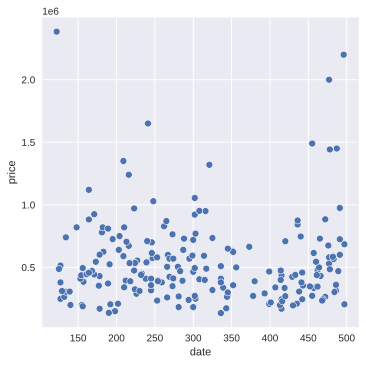

In [23]:
fig = plt.figure(figsize=(10, 5))
sns.relplot(data=data.sample(200), x='date', y=y)

In [24]:
from scipy.stats.stats import pearsonr 
from scipy.stats.stats import spearmanr

In [25]:
pearsonr(data['date'], y)

(-0.004356679615796965, 0.5218754252580069)

In [26]:
spearmanr(data['date'], y)

SpearmanrResult(correlation=-0.010796681950584131, pvalue=0.11246427840815389)

In [27]:
data.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

<Figure size 720x360 with 0 Axes>

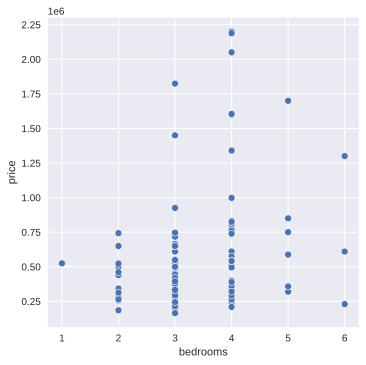

In [28]:
fig = plt.figure(figsize=(10, 5))
sns.relplot(data=data.sample(100), x='bedrooms', y=y)

In [29]:
pearsonr(data['bedrooms'], y)

(0.3083495981456382, 0.0)

In [30]:
spearmanr(data['bedrooms'], y)

SpearmanrResult(correlation=0.34465237095978885, pvalue=0.0)

In [33]:
data.shape

(21613, 19)

In [34]:
pearson_matrix = np.zeros((19, 19))
spearman_matrix = np.zeros((19, 19))
for i, col in enumerate(data.columns):
    for j, col2 in enumerate(data.columns):
        pearson = pearsonr(data[col], data[col2])
        spearman = spearmanr(data[col], data[col2])
        pearson_matrix[i, j] = pearson[0]
        spearman_matrix[i, j] = spearman[0]

In [64]:
item.

Signature: item.set_position(xy)
Docstring:
Set the (*x*, *y*) position of the text.

Parameters
----------
xy : (float, float)
File:      ~/anaconda3/lib/python3.8/site-packages/matplotlib/text.py
Type:      method


sns.

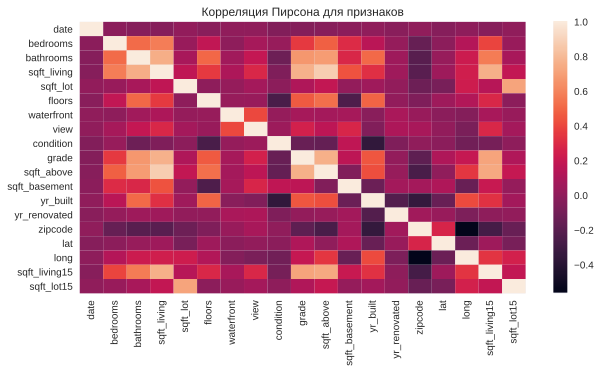

In [220]:
fig = plt.figure(figsize=(10, 5))
plt.title('Корреляция Пирсона для признаков')
hmap = sns.heatmap(pearson_matrix)
for item in hmap.get_xticklabels():
    item.set_rotation(90)
    item.set_x(20)
for item in hmap.get_yticklabels():
    item.set_rotation(0)
hmap.set_xticklabels(data.columns)
hmap.set_yticklabels(data.columns)
plt.savefig('pearson_feat.pdf', bbox_inches="tight")

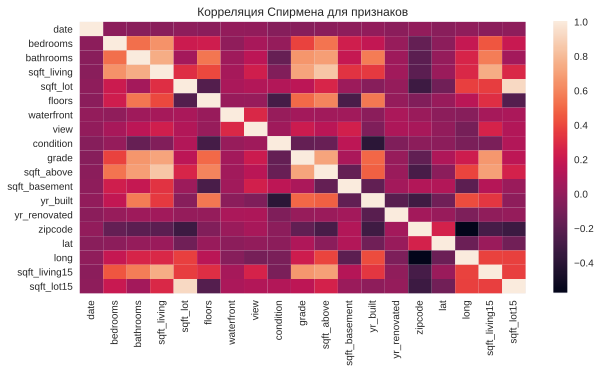

In [91]:
fig = plt.figure(figsize=(10, 5))
plt.title('Корреляция Спирмена для признаков')
hmap = sns.heatmap(spearman_matrix)
for item in hmap.get_xticklabels():
    item.set_rotation(90)
    item.set_x(20)
for item in hmap.get_yticklabels():
    item.set_rotation(0)
hmap.set_xticklabels(data.columns)
hmap.set_yticklabels(data.columns)
plt.show()

In [140]:
pearson_lst = []
spearman_lst = []
pearson_pval = []
spearman_pval = []
for col in data.columns:
    pearson = pearsonr(data[col], y)
    spearman = spearmanr(data[col], y)
    pearson_lst.append(pearson[0])
    spearman_lst.append(spearman[0])
    pearson_pval.append(pearson[1])
    spearman_pval.append(spearman[1])
    print("****column = '{}'****".format(col))
    print("pearson = {}, p value = {}".format(pearson[0], pearson[1]))
    print("spearman = {}, p value = {}".format(spearman[0], spearman[1]))

****column = 'date'****
pearson = -0.004356679615796965, p value = 0.5218754252580069
spearman = -0.010796681950584131, p value = 0.11246427840815389
****column = 'bedrooms'****
pearson = 0.3083495981456382, p value = 0.0
spearman = 0.34465237095978885, p value = 0.0
****column = 'bathrooms'****
pearson = 0.5251375054139619, p value = 0.0
spearman = 0.49716035081092047, p value = 0.0
****column = 'sqft_living'****
pearson = 0.7020350546117999, p value = 0.0
spearman = 0.6441909821578404, p value = 0.0
****column = 'sqft_lot'****
pearson = 0.08966086058710013, p value = 7.972504510411444e-40
spearman = 0.07493937028457391, p value = 2.678892688566925e-28
****column = 'floors'****
pearson = 0.2567938875507184, p value = 1.6e-322
spearman = 0.32234655003563695, p value = 0.0
****column = 'waterfront'****
pearson = 0.2663694340306022, p value = 0.0
spearman = 0.1150892802866442, p value = 1.2545142221495529e-64
****column = 'view'****
pearson = 0.39729348829450417, p value = 0.0
spearman =

Text(0, 0.5, 'Признак')

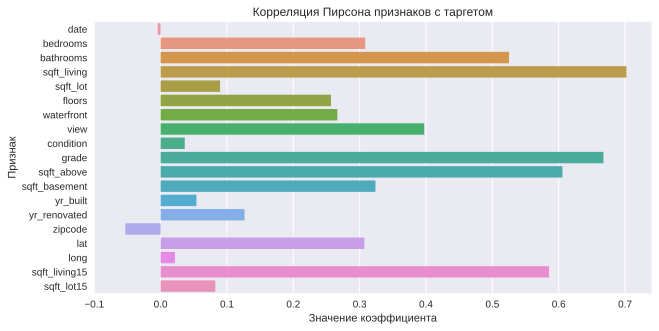

In [158]:
fig = plt.figure(figsize=(10, 5))
plt.title('Корреляция Пирсона признаков с таргетом')
bplot = sns.barplot(y=data.columns, x=pearson_lst, orient='h')
plt.xlabel('Значение коэффициента')
plt.xticks([0.1*i for i in range(-1, 8)])
plt.ylabel('Признак')

In [101]:
from sklearn.base import BaseEstimator, TransformerMixin

class CounterEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y, categorical=None):
        self.val_dic = {}

        def count(col, y, global_mean):
            col_group = y.groupby(col)
            new_vals = ((col_group.sum() + 10*global_mean) /
                        (10 + col_group.count()) +
                        0.01*np.random.randn(1)
                       )
            self.val_dic[new_vals.index.name] = new_vals
            return col.apply(lambda val: new_vals[val])

        mean = y.mean()
        X[categorical].apply(count, axis=0, args=(y, mean))
        return self
    
    def transform(self, X):
        def set_new_vals(col):
            if col.name in self.val_dic:
                new_vals = self.val_dic[col.name]
                return col.apply(lambda val: new_vals[val] if val in new_vals else 0)
            return col

        return X.apply(set_new_vals, axis=0)

In [102]:
!pip install feature-engine

     |████████████████████████████████| 180 kB 1.6 MB/s eta 0:00:01


In [25]:
from feature_engine.encoding import CountFrequencyEncoder
from feature_engine.encoding import OrdinalEncoder

In [33]:
data.nunique(axis=0)

date              372
bedrooms           13
bathrooms          30
sqft_living      1038
sqft_lot         9782
floors              6
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
yr_built          116
yr_renovated       70
zipcode            70
lat              5034
long              752
sqft_living15     777
sqft_lot15       8689
dtype: int64

In [26]:
categorical = ['date', 'yr_built', 'yr_renovated', 'zipcode']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=42)

In [28]:
encoder = OrdinalEncoder(encoding_method='arbitrary', variables=categorical, ignore_format=True)
data_c = encoder.fit_transform(data)

In [29]:
X_train_c, X_test_c, y_train, y_test = train_test_split(data_c, y, test_size=0.3, random_state=42)

In [142]:
pearson_lst_c = []
spearman_lst_c = []
pearson_pval = []
spearman_pval = []
for col in data_c.columns:
    pearson = pearsonr(data_c[col], y)
    spearman = spearmanr(data_c[col], y)
    pearson_lst_c.append(pearson[0])
    spearman_lst_c.append(spearman[0])
    pearson_pval.append(pearson[1])
    spearman_pval.append(spearman[1])

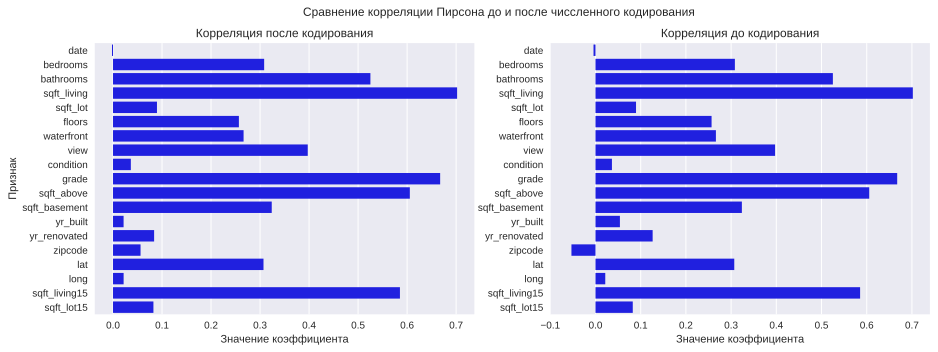

In [224]:
fig = plt.figure(figsize=(15, 5))
plt.suptitle('Сравнение корреляции Пирсона до и после чиссленного кодирования')
plt.subplot(1, 2, 1)
plt.title('Корреляция после кодирования')
bplot = sns.barplot(y=data.columns, x=pearson_lst_c, orient='h', color='blue')
plt.xlabel('Значение коэффициента')
plt.ylabel('Признак')

plt.subplot(1, 2, 2)
plt.title('Корреляция до кодирования')
bplot = sns.barplot(y=data.columns, x=pearson_lst, orient='h', color='blue')
plt.xlabel('Значение коэффициента')
plt.xticks([0.1*i for i in range(-1, 8)])
plt.savefig('feat_target_corr.pdf')

In [30]:
X_train_c, X_test_c, y_train, y_test = train_test_split(data_c.drop('date', axis=1), y, test_size=0.3, random_state=42)

In [31]:
X_train_c = X_train_c.to_numpy()
X_test_c = X_test_c.to_numpy()
y_train_c = y_train.to_numpy()
y_test_c = y_test.to_numpy()

In [175]:
val_score = rf.fit(X_train_c, y_train_c, X_test_c, y_test_c)
((rf.predict(X_test_c) - y_test_c)**2).mean() ** 0.5

167103.37240333337

In [32]:
import time

In [132]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [229]:
rf_result = np.zeros((35, 20, 200))
rf_time = np.zeros((35, 20))
for i in [5, 7, 15, 20]:
    print(i)
    for j in range(1, X_train_c.shape[1]+1):
        rf = RandomForestMSE(200, i, j)
        t = time.time()
        rf_val_score = rf.fit(X_train_c, y_train_c, X_test_c, y_test_c)
        t = time.time() - t
        rf_time[i-5, j-1] = t
        rf_result[i-5, j-1] = np.array(rf_val_score)

5
7
15
20


In [177]:
rf_res_fixedfeat = np.zeros((35, 20, 200))
rf_time = np.zeros((35, 20))
for i in [5, 7, 15, 20]:
    print(i)
    for j in range(1, X_train_c.shape[1]+1):
        rf = RandomForestMSE(200, i)
        t = time.time()
        rf_val_score = rf.fit(X_train_c, y_train_c, X_test_c, y_test_c)
        t = time.time() - t
        rf_time[i-5, j-1] = t
        rf_res_fixedfeat[i-5, j-1] = np.array(rf_val_score)

5
7
15
20


In [178]:
rf_no_depth = np.zeros((20, 200))
rf_time_no_depth = np.zeros(20)
for j in range(1, X_train_c.shape[1]+1):
    rf = RandomForestMSE(200, None)
    t = time.time()
    rf_val_score = rf.fit(X_train_c, y_train_c, X_test_c, y_test_c)
    t = time.time() - t
    rf_time_no_depth[j-1] = t
    rf_no_depth[j-1] = np.array(rf_val_score)

In [56]:
rf = RandomForestMSE(200, 15, 14)
rf_val_score = rf.fit(X_train_c, y_train_c, X_test_c, y_test_c)

In [57]:
rf_val_score[-1]

143392.21167268435

In [179]:
rf_no_depth_feat = np.zeros((20, 200))
for j in range(1, X_train_c.shape[1]+1):
    rf = RandomForestMSE(200, None, j)
    rf_val_score = rf.fit(X_train_c, y_train_c, X_test_c, y_test_c)
    rf_no_depth_feat[j-1] = np.array(rf_val_score)

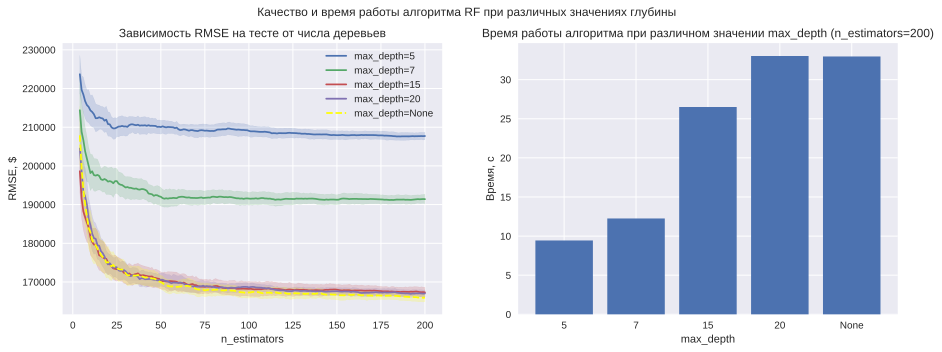

In [225]:
fig = plt.figure(figsize=(15, 5))
plt.suptitle('Качество и время работы алгоритма RF при различных значениях глубины')
plt.subplot(1, 2, 1)
plt.title('Зависимость RMSE на тесте от числа деревьев')
for i in [0, 2, 10, 15]:
    sns.lineplot(x=np.tile(np.arange(1, 201)[3:], 18), y=rf_res_fixedfeat[i][:-2, 3:].ravel(), label='max_depth=%d' % (i+5))
    #sns.lineplot(x=np.arange(1, 201)[3:], y=rf_result[i][7, 3:], label='max_depth=%d' % (i+5))
sns.lineplot(x=np.tile(np.arange(1, 201)[3:], 18), y=rf_no_depth[:-2, 3:].ravel(), linestyle='--',label='max_depth=None', color='yellow')
plt.xlabel('n_estimators')
plt.ylabel('RMSE, $')

plt.subplot(1, 2, 2)
plt.title('Время работы алгоритма при различном значении max_depth (n_estimators=200)')
labels = ['5', '7', '15', '20', 'None']
plt.bar(labels, times)
plt.xlabel('max_depth')
plt.ylabel('Время, с')


plt.savefig('rf_depth.pdf')

In [181]:
times = np.append(rf_time[:, :-1].mean(axis=1)[[0, 2, 10, 15]], rf_time_no_depth.mean())

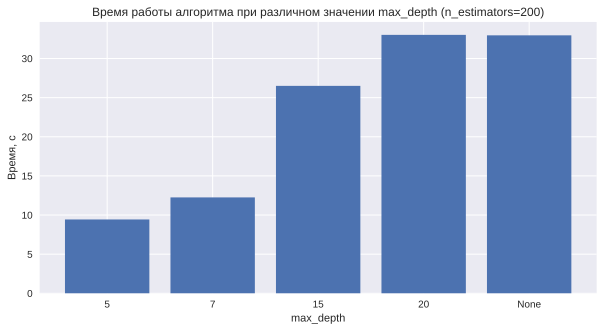

In [226]:
fig = plt.figure(figsize=(10, 5))
plt.title('Время работы алгоритма при различном значении max_depth (n_estimators=200)')
labels = ['5', '7', '15', '20', 'None']
plt.bar(labels, times)
plt.xlabel('max_depth')
plt.ylabel('Время, с')
plt.savefig('rf_time.pdf')

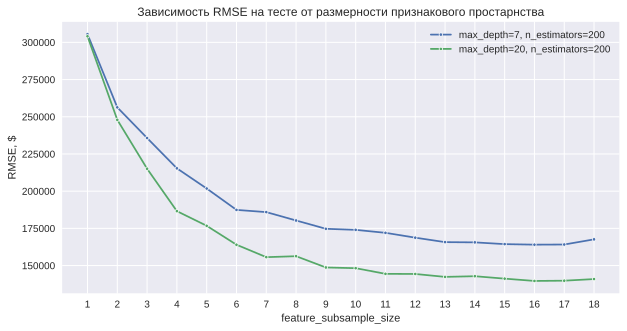

In [238]:
fig = plt.figure(figsize=(10, 5))
plt.title('Зависимость RMSE на тесте от размерности признакового простарнства')
sns.lineplot(x=range(1, X_train.shape[1]), y=[rf_result[2, i, 199] for i in range(0, X_train.shape[1]-1)], label='max_depth=7, n_estimators=200', marker='.')
sns.lineplot(x=range(1, X_train.shape[1]), y=[rf_result[15, i, 199] for i in range(0, X_train.shape[1]-1)], label='max_depth=20, n_estimators=200', marker='.')
#sns.lineplot(x=range(1, X_train.shape[1]), y=[rf_no_depth_feat[i, 199] for i in range(0, X_train.shape[1]-1)], label='max_depth=None')
plt.xticks(range(1, X_train.shape[1]))
plt.xlabel('feature_subsample_size')
plt.ylabel('RMSE, $')
plt.savefig('rf_featsize.pdf')

In [ ]:
rf = RandomForestMSE(200, 15, 6)
val_score = rf.fit(X_train_c, y_train_c, X_test_c, y_test_c)
((rf.predict(X_test_c) - y_test_c)**2).mean() ** 0.5

In [24]:
gb_depth_feat = np.zeros((15, 19, 20))
acc_sum = 0
for depth in range(1, 16):
    print(depth)
    for feat in range(1, X_train_c.shape[1]+1):
        acc_sum = 0
        for k in range(20):
            gb = GradientBoostingMSE(20, 0.1, depth, feat)
            gb_score = gb.fit(X_train_c, y_train_c, X_test_c, y_test_c)
            acc_sum += gb_score[-1]
        gb_depth_feat[depth-1, feat-1] = acc_sum/20

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [42]:
gb_no_depth = np.zeros(19)
for feat in range(1, X_train_c.shape[1]+1):
    acc_sum=0
    for k in range(20):
        gb = GradientBoostingMSE(20, 0.1, None, feat)
        gb_score = gb.fit(X_train_c, y_train_c, X_test_c, y_test_c)
        acc_sum += gb_score[-1]
    gb_no_depth[feat-1] = acc_sum/20

In [43]:
gb_no_depth 

array([321436.29446287, 371278.56744677, 346773.63266564, 326670.9133797 ,
       315021.09382345, 296333.70226588, 284533.26722702, 266219.41487173,
       266789.58446514, 243470.11643181, 230996.35246472, 227968.576051  ,
       228797.30128525, 219608.81317771, 212248.03172454, 205909.36127666,
       203055.4724153 , 198088.72686505,      0.        ])

In [31]:
gb_depth_feat.max(axis=2)[i-1, :-1]

array([253157.91713266, 236884.76664309, 232212.31529048, 223238.43680322,
       220028.75704919, 216708.00662909, 216897.83953417, 213259.88097433,
       212523.79920292, 211863.09280399, 210298.78919633, 207640.37854649,
       207138.17044216, 207089.45108609, 208020.98016688, 208127.06246016,
       208095.74764642, 209792.40557156])

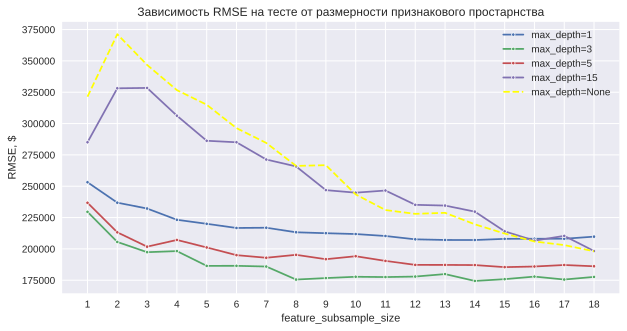

In [46]:
fig = plt.figure(figsize=(10, 5))
plt.title('Зависимость RMSE на тесте от размерности признакового простарнства')
for i in [1, 3, 5, 15]:
    sns.lineplot(x=range(1, X_train_c.shape[1]+1), y=gb_depth_feat.max(axis=2)[i-1, :-1], label='max_depth=%d' % i, marker='.')
sns.lineplot(x=range(1, X_train_c.shape[1]+1), y=gb_no_depth[:-1], label='max_depth=None', color='yellow', linestyle='--')
plt.xticks(range(1, X_train_c.shape[1]+1))
plt.xlabel('feature_subsample_size')
plt.ylabel('RMSE, $')
plt.savefig('gb_featsize.pdf')

In [58]:
rate_lst = [0.05, 0.1, 0.2, 0.3]

In [80]:
runs = 20
gb_rate = dict(zip(rate_lst, [np.zeros((runs, 600)) for i in range(len(rate_lst))]))
gb_time = {}
time_sum = 0
for rate in rate_lst:
    print(rate)
    time_sum = 0
    gb = GradientBoostingMSE(600, rate, 3, 8)
    for j in range(runs):
        t = time.time()
        gb_score = gb.fit(X_train_c, y_train_c, X_test_c, y_test_c)
        t = time.time() - t
        time_sum += t
        gb_rate[rate][j] = gb_score
    gb_time[rate] = time_sum/runs

0.05
0.1
0.2
0.3


In [81]:
gbruns = 20
no_rate = np.zeros((runs, 600))
time_sum = 0
gb = GradientBoostingMSE(600, 1, 3, 8)
for j in range(runs):
    t = time.time()
    gb_score = gb.fit(X_train_c, y_train_c, X_test_c, y_test_c)
    t = time.time() - t
    time_sum += t
    no_rate[j] = gb_score
no_rate_time = time_sum/runs

In [83]:
no_rate

array([[251444.17989632, 233245.82218362, 212547.97581394, ...,
        179406.16998278, 179789.23648155, 179754.83320242],
       [285063.70758011, 244397.2784876 , 205953.34593395, ...,
        175465.93934889, 175472.44002468, 175437.21422254],
       [259140.62862782, 227673.32349019, 228283.33451395, ...,
        165099.20425084, 165126.72813859, 165150.82845209],
       ...,
       [274947.93731489, 234353.17324984, 231950.79870864, ...,
        189686.55953391, 189771.59954518, 189783.92750667],
       [318912.29964707, 277363.91117573, 261293.69759501, ...,
        232766.56045946, 232734.47241392, 232531.18833347],
       [268096.44090813, 235212.68127983, 220523.87338315, ...,
        166488.03225865, 166456.92056094, 166444.11886053]])

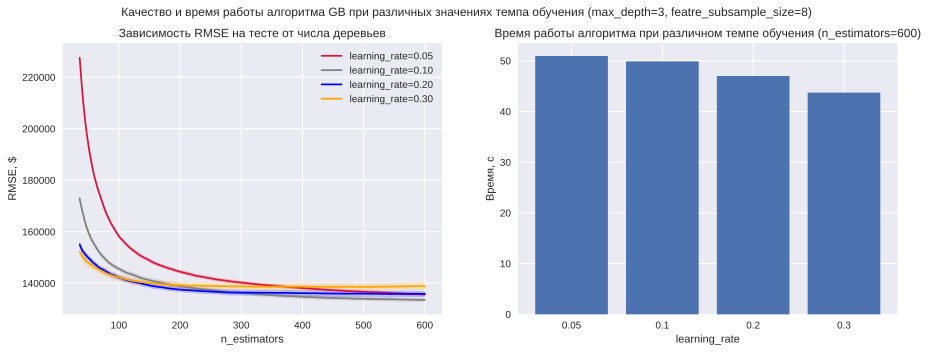

In [86]:
fig = plt.figure(figsize=(15, 5))
plt.suptitle('Качество и время работы алгоритма GB при различных значениях темпа обучения (max_depth=3, featre_subsample_size=8)')
plt.subplot(1, 2, 1)
plt.title('Зависимость RMSE на тесте от числа деревьев')
colors = ['crimson', 'grey', 'blue', 'orange']
for k, i in enumerate([0.05, 0.1, 0.2, 0.3]):
    sns.lineplot(x=np.tile(np.arange(1, 601)[35:], 20), y=gb_rate[i][:, 35:].ravel(), label='learning_rate=%.2f' % i, color=colors[k])
    #sns.lineplot(x=np.tile(np.arange(1, 201)[15:], 20), y=gb_rate[i][:, 15:].ravel(), label='learning_rate=%.3f' % i)
    #sns.lineplot(x=np.arange(1, 201)[3:], y=rf_result[i][7, 3:], label='max_depth=%d' % (i+5))
#sns.lineplot(x=np.tile(np.arange(1, 601)[:], 20), y=no_rate[:, :].ravel(), label='learning_rate=1' , color='yellow', linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('RMSE, $')

plt.subplot(1, 2, 2)
plt.title('Время работы алгоритма при различном темпе обучения (n_estimators=600)')
labels = ['0.05', '0.1', '0.2', '0.3']
plt.bar(labels, gb_time.values())
plt.xlabel('learning_rate')
plt.ylabel('Время, с')


plt.savefig('gb_rate.pdf')

In [76]:
for i in gb_rate[0.2].ravel():
    if i==0:
        print(i)

In [38]:
dict(zip(rate_lst, [np.zeros((20, 200)) for i in range(len(rate_lst))]))

{0.001: array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 0.005: array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 0.01: array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 0.05: array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0.

In [57]:
rf_result[10, 19, :]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [48]:
data = pd.read_csv('kc_house_data.csv')
y = data['price']

In [49]:
data['day'] = pd.to_datetime(data['date']).dt.day
data['month'] = pd.to_datetime(data['date']).dt.month
data['year'] = pd.to_datetime(data['date']).dt.year

In [50]:
data.drop(['id', 'date', 'price'], axis=1, inplace=True)

In [51]:
pearson_lst = []
spearman_lst = []
pearson_pval = []
spearman_pval = []
for col in data.columns:
    pearson = pearsonr(data[col], y)
    spearman = spearmanr(data[col], y)
    pearson_lst.append(pearson[0])
    spearman_lst.append(spearman[0])
    pearson_pval.append(pearson[1])
    spearman_pval.append(spearman[1])
    print("****column = '{}'****".format(col))
    print("pearson = {}, p value = {}".format(pearson[0], pearson[1]))
    print("spearman = {}, p value = {}".format(spearman[0], spearman[1]))

****column = 'bedrooms'****
pearson = 0.3083495981456382, p value = 0.0
spearman = 0.34465237095978885, p value = 0.0
****column = 'bathrooms'****
pearson = 0.5251375054139619, p value = 0.0
spearman = 0.49716035081092047, p value = 0.0
****column = 'sqft_living'****
pearson = 0.7020350546117999, p value = 0.0
spearman = 0.6441909821578404, p value = 0.0
****column = 'sqft_lot'****
pearson = 0.08966086058710013, p value = 7.972504510411444e-40
spearman = 0.07493937028457391, p value = 2.678892688566925e-28
****column = 'floors'****
pearson = 0.2567938875507184, p value = 1.6e-322
spearman = 0.32234655003563695, p value = 0.0
****column = 'waterfront'****
pearson = 0.2663694340306022, p value = 0.0
spearman = 0.1150892802866442, p value = 1.2545142221495529e-64
****column = 'view'****
pearson = 0.39729348829450417, p value = 0.0
spearman = 0.29393116417024306, p value = 0.0
****column = 'condition'****
pearson = 0.036361789128997575, p value = 8.935654062435283e-08
spearman = 0.01848995

In [52]:
data.drop('year', axis=1, inplace=True)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=42)

In [20]:
rf = RandomForestMSE(100, 21, 10)
gb = GradientBoostingMSE(45, 0.01)

In [40]:
rf_val_score = rf.fit(X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy())
gb_val_score = gb.fit(X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy())

In [41]:
print('RF RMSE = ', ((rf.predict(X_test.to_numpy()) - y_test.to_numpy())**2).mean() ** 0.5)
print('GB RMSE = ',((gb.predict(X_test.to_numpy()) - y_test.to_numpy())**2).mean() ** 0.5)

RF RMSE =  152745.57118519951
GB RMSE =  195724.38839020368


In [21]:
from sklearn.metrics import mean_squared_error

In [43]:
gb.predict(X_test.to_numpy())

array([ 361771.24466582,  902424.76378601, 1232057.41702617, ...,
        293254.55078955,  929333.19435839,  511676.334438  ])

In [22]:
from sklearn.tree import DecisionTreeRegressor

In [45]:
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X_train.to_numpy()[:, 1:], y_train.to_numpy())
mean_squared_error(y_test, tree.predict(X_test.to_numpy()[:, 1:]) , squared = False)

217923.04494160906

In [46]:
X_train.shape

(15129, 20)

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [48]:
data.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'day', 'month'],
      dtype='object')

In [49]:
data['yr_renovated'].nunique()

70

In [50]:
categorical = ['yr_renovated']

In [51]:
column_transformer = ColumnTransformer([('ohe',
                                         OneHotEncoder(handle_unknown='ignore'),
                                         categorical)], remainder='passthrough')

In [52]:
X_train_ohe = column_transformer.fit_transform(X_train)
X_test_ohe = column_transformer.transform(X_test)

In [53]:
rf = RandomForestMSE(200, 40, 10)
gb = GradientBoostingMSE(100, 0.01)

In [54]:
rf_val_score = rf.fit(X_train_ohe, y_train.to_numpy(), X_test_ohe, y_test.to_numpy())
gb_val_score = gb.fit(X_train_ohe, y_train.to_numpy(), X_test_ohe, y_test.to_numpy())

In [55]:
print('RF RMSE = ', ((rf.predict(X_test_ohe) - y_test.to_numpy())**2).mean() ** 0.5)
print('GB RMSE = ', ((gb.predict(X_test_ohe) - y_test.to_numpy())**2).mean() ** 0.5)

RF RMSE =  246890.90832985312
GB RMSE =  208730.6607216128


In [56]:
X_test_ohe

<6484x88 sparse matrix of type '<class 'numpy.float64'>'
	with 113528 stored elements in Compressed Sparse Row format>

In [24]:
data['yr_renovated'].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944])

In [25]:
data['yr_renovated'][data['yr_renovated'] > 0] -= 1933

<ipython-input-25-fe4abd814fc9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['yr_renovated'][data['yr_renovated'] > 0] -= 1933


In [26]:
data['yr_renovated'].unique()

array([ 0, 58, 69, 77, 66, 59, 80, 61, 45, 72, 75, 70, 51, 21, 81, 78, 41,
       50, 12, 57, 55, 24, 44, 48, 62, 67, 65, 37, 56, 71, 53, 76, 74, 54,
       40, 73, 52, 68, 47, 38, 46, 64, 17, 36, 15, 82, 35, 79, 30, 18, 60,
       29, 63, 39, 20, 22, 49, 23,  7, 43, 13, 42, 25, 31, 26, 27, 34, 32,
        1, 11])

In [71]:
    pearson = pearsonr(data['yr_renovated'], y)
    spearman = spearmanr(data['yr_renovated'], y)
    pearson_lst.append(pearson[0])
    spearman_lst.append(spearman[0])
    pearson_pval.append(pearson[1])
    spearman_pval.append(spearman[1])
    print("****column = '{}'****".format(col))
    print("pearson = {}, p value = {}".format(pearson[0], pearson[1]))
    print("spearman = {}, p value = {}".format(spearman[0], spearman[1]))

****column = 'year'****
pearson = 0.1329055037553552, p value = 9.476117404512642e-86
spearman = 0.10187550718175704, p value = 5.829964494051964e-51


In [136]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=42)

In [137]:
rf = RandomForestMSE(200, 40, 10)
gb = GradientBoostingMSE(100, 0.01)

In [138]:
rf_val_score = rf.fit(X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy())
gb_val_score = gb.fit(X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy())

In [139]:
print('RF RMSE = ', ((rf.predict(X_test.to_numpy()) - y_test.to_numpy())**2).mean() ** 0.5)
print('GB RMSE = ',((gb.predict(X_test.to_numpy()) - y_test.to_numpy())**2).mean() ** 0.5)

RF RMSE =  152531.73397381845
GB RMSE =  204114.47305479253


In [80]:
data['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

In [141]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [31]:
import numpy as np

In [32]:
rf_result = np.zeros((35, 20, 200))
for i in range(5, 41):
    print(i)
    for j in range(1, X_train.shape[1]+1):
        rf = RandomForestMSE(200, i)
        rf_val_score = rf.fit(X_train, y_train, X_test, y_test)
        rf_result[i-5, j-1] = np.array(rf_val_score)

5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32


KeyboardInterrupt: 

In [149]:
rf_no_maxdepth = np.zeros((20, 200))
for i in range(1, X_train.shape[1]):
    rf = RandomForestMSE(200, None, i)
    rf_val_score = rf.fit(X_train, y_train, X_test, y_test)
    rf_no_maxdepth[i-1] = np.array(rf_val_score)

In [165]:
for i in range(0, X_train.shape[1]):
    print(rf_no_maxdepth[i, 199])

308463.3603077454
252556.96435881284
225837.94221888448
195214.96926396084
179969.44161655795
166841.47939476167
160165.72194548405
153752.7622078296
152130.0784265757
151136.00068222993
148210.2762423025
146702.35462761723
145122.5244290792
143138.00841909795
141568.9344973301
142643.2783694541
141130.59210538876
142656.19977348173
144786.82549337903
0.0


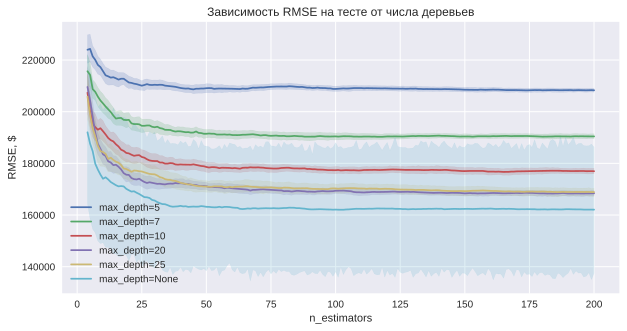

In [151]:
fig = plt.figure(figsize=(10, 5))
plt.title('Зависимость RMSE на тесте от числа деревьев')
for i in [0, 2, 5, 15, 20]:
    sns.lineplot(x=np.tile(np.arange(1, 201)[3:], 20), y=rf_result[i][:, 3:].ravel(), label='max_depth=%d' % (i+5))
sns.lineplot(x=np.tile(np.arange(1, 201)[3:], 20), y=rf_no_maxdepth[:, 3:].ravel(), label='max_depth=None')
plt.xlabel('n_estimators')
plt.ylabel('RMSE, $')
plt.savefig('rf_depth.pdf')

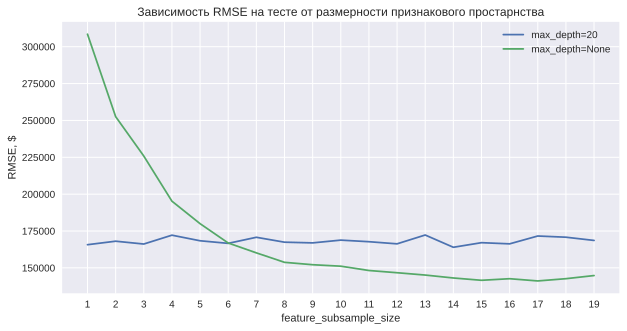

In [177]:
fig = plt.figure(figsize=(10, 5))
plt.title('Зависимость RMSE на тесте от размерности признакового простарнства')
sns.lineplot(x=range(1, X_train.shape[1]), y=[rf_result[15, i][-1:][0] for i in range(0, X_train.shape[1]-1)], label='max_depth=20')
sns.lineplot(x=range(1, X_train.shape[1]), y=[rf_no_maxdepth[i, 199] for i in range(0, X_train.shape[1]-1)], label='max_depth=None')
plt.xticks(range(1, X_train.shape[1]))
plt.xlabel('feature_subsample_size')
plt.ylabel('RMSE, $')
plt.savefig('rf_featsize.pdf')

In [174]:
rf_result[15, i][-1:][0]

172553.90307251646

In [77]:
np.arange(200)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [91]:
gb_result = np.zeros((15, 20, 4, 200))
rate_lst = [0.01, 0.05, 0.1, 0.2]
for i in range(1, 16):
    print(i)
    for j in range(1, X_train.shape[1]+1):
        for k, rate in enumerate(rate_lst):
            gb = GradientBoostingMSE(200, rate, i)
            gb_val_score = gb.fit(X_train, y_train, X_test, y_test)
            gb_result[i-1, j-1, k] = np.array(rf_val_score)

1
2
3
4
5
6
7
8
9
10
11


KeyboardInterrupt: 

In [90]:
fig = plt.figure(figsize=(10, 5))
for i in [0, 2, 5, 15]:
    sns.lineplot(x=np.tile(np.arange(200)+1, 20), y=gb_result[i].ravel(), label='max_depth=%d' % (i+5))

Init signature:
GradientBoostingMSE(
    n_estimators,
    learning_rate=0.1,
    max_depth=5,
    feature_subsample_size=None,
    **trees_parameters,
)
Docstring:      <no docstring>
Init docstring:
n_estimators : int
    The number of trees in the forest.
learning_rate : float
    Use alpha * learning_rate instead of alpha
max_depth : int
    The maximum depth of the tree. If None then there is no limits.
feature_subsample_size : float
    The size of feature set for each tree. If None then use one-third of all features.
File:           ~/pyprogramms/Ensembles/ensembles.py
Type:           type
Subclasses:     
